[*********************100%%**********************]  1 of 1 completed


Mean Squared Error: 1.076404338755725


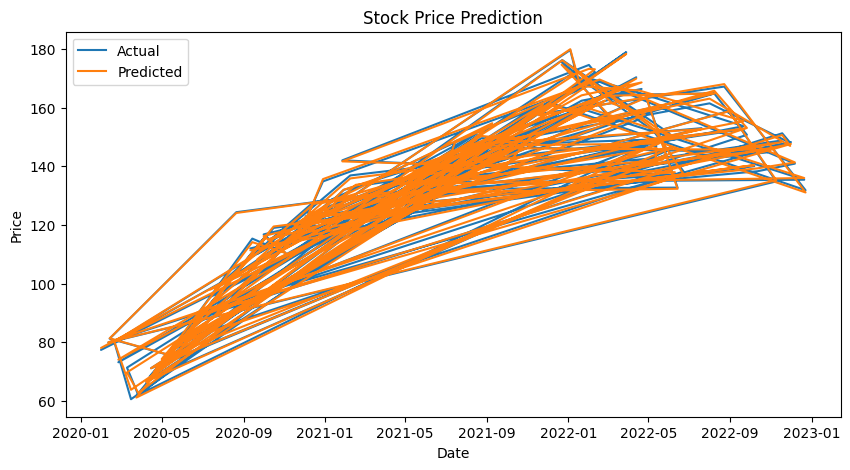

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Fetch historical data
stock_symbol = "AAPL"  # Example: Apple Inc.
data = yf.download(stock_symbol, start="2020-01-01", end="2023-01-01")

# Preprocess data
data['SMA_20'] = data['Close'].rolling(window=20).mean()  # 20 days Simple Moving Average
data = data.dropna()
X = data[['Open', 'High', 'Low', 'SMA_20']]
y = data['Close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting predicted vs actual values
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
